In [1]:
%cd segment-anything
!pip install -e .


C:\Users\supha\Documents\65011048\segment-anything
Obtaining file:///C:/Users/supha/Documents/65011048/segment-anything
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: segment_anything
    Found existing installation: segment_anything 1.0
    Uninstalling segment_anything-1.0:
      Successfully uninstalled segment_anything-1.0
  Running setup.py develop for segment_anything


  DEPRECATION: Legacy editable install of segment_anything==1.0 from file:///C:/Users/supha/Documents/65011048/segment-anything (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


In [2]:
import cv2
import os
import requests
import numpy as np
from matplotlib import pyplot as plt
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
from io import BytesIO
from PIL import Image


In [3]:
# ฟังก์ชันสำหรับการแสดงผลภาพใน Jupyter Notebook
def show_image(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
# โหลดโมเดล SAM
print("เริ่มต้นการโหลดโมเดล SAM...")
try:
    sam = sam_model_registry["vit_h"](checkpoint=r"C:\Users\supha\Documents\65011048\sam_vit_h_4b8939.pth")
#     predictor = SamPredictor(sam)
    mask_generator = SamAutomaticMaskGenerator(sam)
    
    print("โมเดล SAM โหลดสำเร็จ")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการโหลดโมเดล: {e}")
#     exit()

เริ่มต้นการโหลดโมเดล SAM...
โมเดล SAM โหลดสำเร็จ


In [5]:
# โหลดภาพนิ่งจาก URL
image_url = ""
if image_url != "":
    print(f"กำลังโหลดภาพจาก URL: {image_url}")
    try:
        response = requests.get(image_url)
        img_pil = Image.open(BytesIO(response.content))  # ใช้ PIL โหลดภาพ
        image = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)  # แปลงเป็นฟอร์แมตที่ใช้กับ cv2
        print("โหลดภาพสำเร็จ")
    except Exception as e:
        print(f"ไม่สามารถโหลดภาพจาก URL ได้: {e}")
#         exit()
    
else:
    # โหลดภาพนิ่งจากเครื่อง
    image_path = r"C:\Users\supha\Documents\65011048\test-image\IMG_1089_022.jpg"  # ระบุเส้นทางของภาพในเครื่อง
    print(f"กำลังโหลดภาพจากเส้นทาง: {image_path}")
    try:
        image = cv2.imread(image_path)  # ใช้ cv2.imread() เพื่อโหลดภาพ
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        if image is None:
            raise Exception("ไม่สามารถโหลดภาพได้")  # กรณีที่ไม่สามารถโหลดภาพได้
        print("โหลดภาพจากเครื่องสำเร็จ")
    except Exception as e:
        print(f"ไม่สามารถโหลดภาพได้: {e}")
#         exit()

กำลังโหลดภาพจากเส้นทาง: C:\Users\supha\Documents\65011048\test-image\IMG_1089_022.jpg
โหลดภาพจากเครื่องสำเร็จ


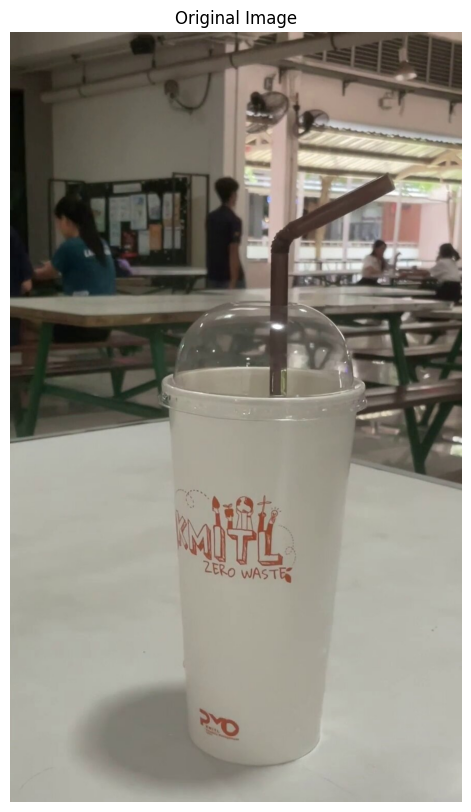

In [6]:
# แสดงภาพต้นฉบับใน Jupyter Notebook
show_image(image, title="Original Image")

In [ ]:
# ปรับขนาดภาพ (เช่น ขนาด 512x512 พิกเซล)
new_size = (512, 512)  # ขนาดใหม่ที่ต้องการ
image_resized = cv2.resize(image, new_size)
print(f"ปรับขนาดภาพเป็น {new_size} สำเร็จ")

# แสดงภาพที่ถูกปรับขนาดแล้ว
show_image(image_resized, title="Resized Image")

In [7]:
# ทำ segmentation บนภาพนิ่ง
print("กำลังทำการ segmentation บนภาพ...")
try:
#     predictor.set_image(image)
#     confidence_threshold = 0.9  # ลองปรับ threshold ให้สูงขึ้น
#     masks, scores, _ = predictor.predict()
#     selected_masks = [masks[i] for i in range(len(scores)) if scores[i] > confidence_threshold]
    masks = mask_generator.generate(image)
    print(f"การ segmentation สำเร็จ: พบ {len(masks)} mask(s) ในภาพ")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการทำ segmentation: {e}")
#     exit()




กำลังทำการ segmentation บนภาพ...
การ segmentation สำเร็จ: พบ 119 mask(s) ในภาพ


In [12]:
print(masks[0:4])

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 414638, 'bbox': [2, 755, 873, 740], 'predicted_iou': 1.0268852710723877, 'point_coords': [[41.15625, 1285.625]], 'stability_score': 0.9897526502609253, 'crop_box': [0, 0, 878, 1496]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 199481, 'bbox': [311, 734, 356, 689], 'predicted_iou': 1.02185070

In [21]:
# นำ mask มาซ้อนทับกับภาพต้นฉบับเพื่อแสดงผล
print("กำลังนำ mask มาซ้อนทับกับภาพต้นฉบับ...")
for i, mask in enumerate(masks):
    mask_cap = mask['segmentation']
    overlay = image.copy()
    overlay[mask_cap] = [255, 255, 0]  # เปลี่ยนสีส่วนที่เป็น mask เป็นสีเขียว
print("ซ้อนทับ mask ลงบนภาพสำเร็จ")

กำลังนำ mask มาซ้อนทับกับภาพต้นฉบับ...
ซ้อนทับ mask ลงบนภาพสำเร็จ


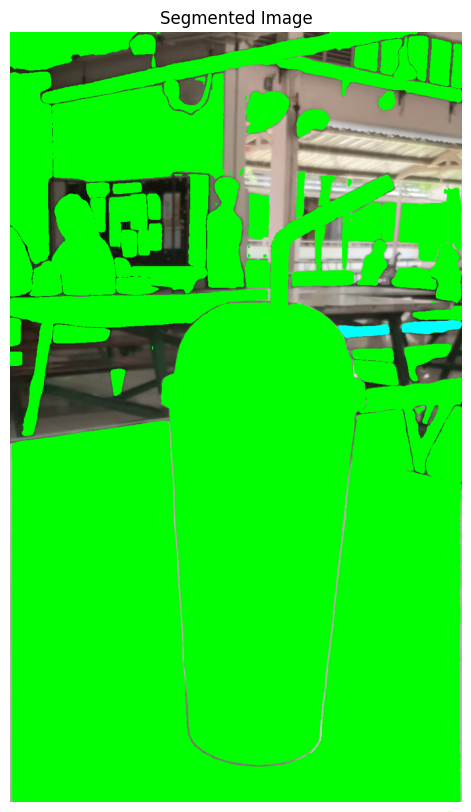

In [22]:
# แสดงผลภาพที่ถูกทำ segmentation ใน Jupyter Notebook
show_image(overlay, title="Segmented Image")